# I. Numpy

### Импортируйте NumPy

In [3]:
import numpy as np

### Создайте одномерный массив размера 10, заполненный нулями и пятым элемент равным 1. Трансформируйте в двумерный массив.

In [4]:
array = np.zeros(10)
array[4]=1
array = array.reshape(2,5)
print(array)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]]


### Создайте одномерный массив со значениями от 10 до 49 и разверните его (первый элемент становится последним). Найдите в нем все четные элементы.

In [3]:
array = np.random.randint(10, 49, size=39)
print(array)
array_new = array[::-1]
print(array_new)

[37 47 12 45 45 28 17 28 33 36 42 42 47 31 41 22 10 34 43 30 39 31 14 18
 38 25 27 41 19 39 25 23 37 19 31 12 11 31 18]
[18 31 11 12 31 19 37 23 25 39 19 41 27 25 38 18 14 31 39 30 43 34 10 22
 41 31 47 42 42 36 33 28 17 28 45 45 12 47 37]


### Создайте двумерный массив 3x3 со значениями от 0 до 8

In [6]:
array = np.arange(9).reshape(3, 3)
print(array)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


### Создайте массив 4x3x2 со случайными значениями. Найти его минимум и максимум.

In [7]:
array = np.random.randint(1, 30, size=(4,3,2))
print(array)

[[[18 11]
  [20 15]
  [20 26]]

 [[26 13]
  [25 29]
  [ 4 27]]

 [[ 5  9]
  [19 28]
  [ 5 18]]

 [[ 5  6]
  [18 10]
  [ 7  8]]]


### Создайте два двумерных массива размерами 6x4 и 4x3 и произведите их матричное умножение. 

In [10]:
array_1 =  np.random.randint(1, 30, size=(6,4))
array_2 = np.random.randint(30, 40, size=(4,3))

np.matmul(array_1,array_2)

array([[2849, 2696, 2753],
       [1062,  969, 1086],
       [1877, 1708, 1831],
       [3030, 2871, 2928],
       [1559, 1321, 1583],
       [2035, 1893, 2013]])

### Создайте случайный двумерный массив 7x7, найти у него среднее и стандартное оклонение. Нормализуйте этот массив.

In [13]:
array = np.random.randint(1, 30, size=(7,7))
#среднее
aver = array.mean()
#стандартное оклонение
skv = np.nanstd(array)
#Нормализация
norm = np.linalg.norm(array)
norm_total = np.sum([val/norm for val in array ])

print(aver)
print(skv)
print(norm)

13.755102040816327
8.135411664370238
111.8659912573969


# II. Pandas

### Импортируйте: pandas, matplotlib, seaborn

In [15]:
import sys
#!{sys.executable} -m pip install seaborn
import matplotlib as mpl
import pandas as pd 
import seaborn as sns
import numpy as np

### Загрузите датасет Tips из набора датасетов seaborn

In [16]:
tips = sns.load_dataset('tips')


### Посмотрите на первые 5 строчек

In [17]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Узнайте сколько всего строчек и колонок в данных

In [21]:

size = tips.shape
print(size)

(244, 7)


### Проверьте есть ли пропуски в данных

In [22]:
#(tips[:, 0] == " ")
tips.isnull().sum()


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Посмотрите на распределение числовых признаков

In [23]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Найдите максимальное значение 'total_bill'

In [24]:
tips["total_bill"].max()

50.81

### Найдите количество курящих людей

In [25]:
(tips["smoker"]=="Yes").sum()

93

### Узнайте какой средний 'total_bill' в зависимости от 'day'

In [21]:
tips.groupby("day").total_bill.mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

### Отберите строчки с 'total_bill' больше медианы и узнайте какой средний 'tip' в зависимости от 'sex'

In [32]:
tips[tips.total_bill>tips.total_bill.median()].groupby("sex").tip.mean()

sex
Male      3.756404
Female    3.663939
Name: tip, dtype: float64

### Преобразуйте признак 'smoker' в бинарный (0-No, 1-Yes)

In [34]:
smoker_bin = np.where(tips["smoker"] == "Yes", 1 ,0) 


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1
 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0]


# III. Visualization

### Постройте гистограмму распределения признака 'total_bill'

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

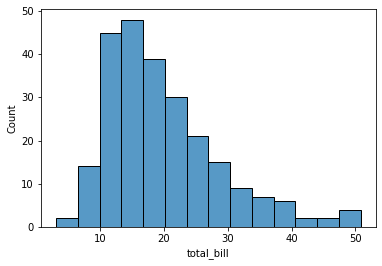

In [35]:
data = tips["total_bill"]
sns.histplot(data)

### Постройте scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

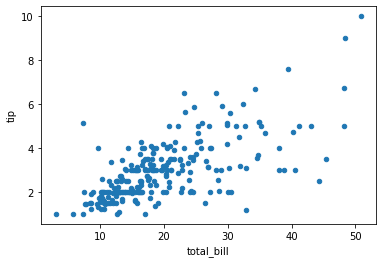

In [36]:
data_scatter = tips[["total_bill","tip"]]
data_scatter.plot.scatter(x="total_bill",y="tip")

### Постройте pairplot

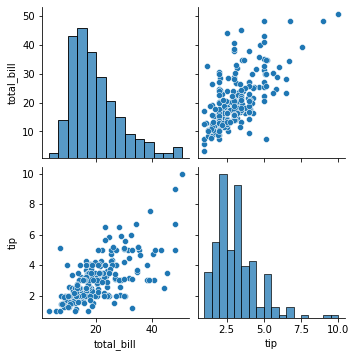

In [37]:
sns.pairplot(data_scatter)

### Постройте график взаимосвязи между признаками 'total_bill' и 'day'

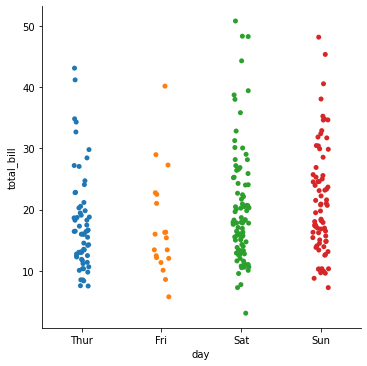

In [34]:
sns.catplot(x="day",y="total_bill",data=tips)

### Постройте две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

<AxesSubplot:ylabel='Frequency'>

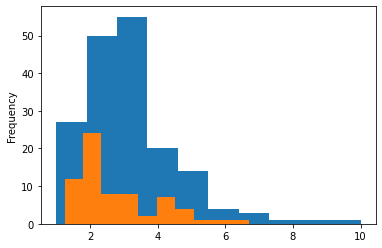

In [59]:
data_dinner = tips.tip[tips.time == "Dinner"]
data_lunch = tips.tip[tips.time == "Lunch"] 

data_dinner.plot(kind="hist")

data_lunch.plot(kind="hist")
#where is Denner?where is Lunch?

### Постройте два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой для Female и раскрасьте точки в зависимоти от признака 'smoker'

Male
Female


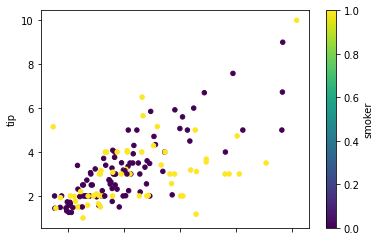

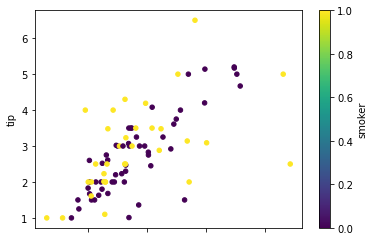

In [49]:

tips["smoker"] = np.where(tips["smoker"] == "Yes", 1 ,0) 

data_scatter_yes = tips.groupby("sex")




for sex,num in data_scatter_yes:
    print(sex)
    #print(num)
    num.plot.scatter(x="total_bill",y="tip",c="smoker",cmap="viridis")
data_scatter_yes    
#data_scatter_yes = data_scatter_yes[["total_bill","tip"]]
#data_scatter_yes.plot.scatter(x="total_bill",y="tip",c="smoker",cmap="viridis")
#for name, group in data_scatter_yes:
  #  plt.plot(group.total_bill, group.tip, marker='o', linestyle='', markersize=12, label=name)

#plt.legend()

#data_scatter_yes.plot.scatter(x="total_bill",y="tip",c=data_scatter_yes.sex)
#data_scatter_yes.plot.scatter(x="total_bill",y="tip",color='gray')

## Сделайте выводы по анализу датасета и построенным графикам. По желанию можете продолжить анализ данных и также отразить это в выводах.

In [94]:
На основе анализа данного датасета было изучено влияние двух факторов(чаевых,пола,курения) на общем счете("total_bill")
На двух диаграммах, расположенных выше видно отсутствие зависимости общего чека от фактора курения(о чем говорит его 
равномерное распределение) у женского и   мужского полов. Следует обратить внимание на 
преобладание у вторых курящих,что на первый взгляд может ввести в заблуждение. Прослеживается сильная
сосредоточенность мужского пола в чеке не превышающем медианы. У слабого пола распределение прошло
достаточно равномерно с не сильным преобладанием в левую сторону от медианы. Касаемо признака "чаевых" - у сильного 
пола признак более подвержен выбросам до 10 единиц, у слабого  всего 6. Исходя из данного исследования можно сделать 
следующие выводы:
    1)Мужчины менее расчетливы в общем чеке, но не скупятся на "чаевые".
    2)Женщины ,наоборот,расчетливы в чаевых и не скупятся на собственный комфорт в общем счете,как ,впрочем, и в жизни.
    3)Признак курения показал ,что а)курящих мужчин гораздо больше чем курящих женщин,б)с повышением чека людей становится 
                                    меньше, признак курения не влияет.
                                    


SyntaxError: invalid syntax (<ipython-input-94-429192178e1f>, line 1)